# Neural Network Classification


In this notebook we are going to learn, how to write neural network for classification problem.

> What is classification?

A classification is where you try to classify something as one thing or another
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Create data to view and fit

In [1]:
# Classic Import

from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [3]:
# lets visualize the data

circle = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circle.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


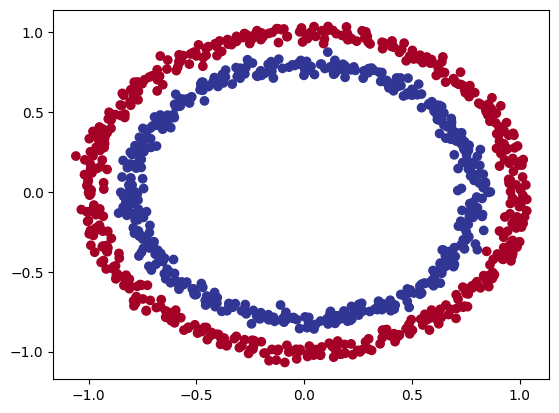

In [4]:
# lets use plot

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Inspect our data, Input and output shapes



In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# view first example of feature and label
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1) Get data ready, turn it into tensor
2) Build or pick a model
3) Fit the model to the data and make prediction
4) Evaluate the model
5) Improve through experiment

In [7]:
# set random seed
tf.random.set_seed(42)

# create a model with sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2) compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryFocalCrossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.4565 - loss: 7.6634 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.4799 - loss: 0.1818
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.5111 - loss: 0.1735
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5109 - loss: 0.1734
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.5060 - loss: 0.1736


# Improving the model

Since our model is guessing, we need to improve the model

1) Create a model: we might need to add more layers or increase the number of hidden units within a layer.
2) Compiling a mode: here we might choose a different optimization function such as adam instead of SGD
3) Fitting a model: Perhaps, we might fit our model for more epochs

In [8]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_2_history = model_2.fit(X, y, epochs=100, verbose=0)
     

In [9]:
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.5154 - loss: 0.6926


[0.6933707594871521, 0.49900001287460327]

<Axes: >

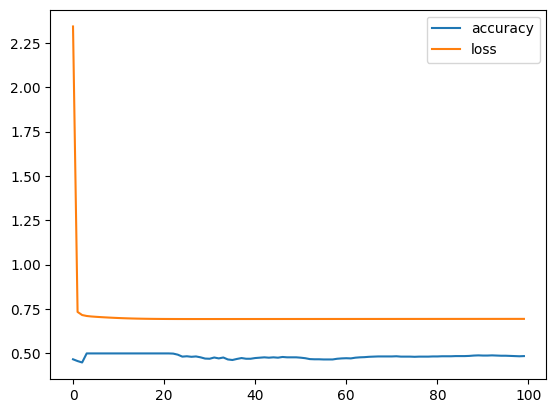

In [10]:
pd.DataFrame(model_2_history.history).plot()

## Visualize the prediction

To visualized or model's prediction, lets create a function `plot_decision_boundry()`, this function will:
* Take in trained model, feature X and labels y
* Create a meshgrid of different X values
* Make prediction across the meshgrid 
* Plot the prediction as well as a line between difference zone (where each unique class falls)

In [11]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model
    :param model: trained model 
    :param X: features
    :param y: labels
    :return: 
    """
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
doing binary classification


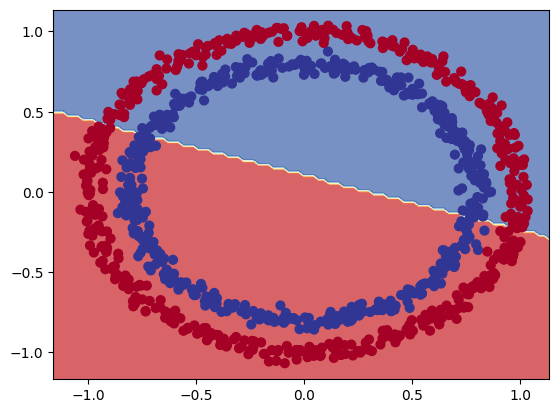

In [12]:
# check out prediction our model is making
plot_decision_boundary(model_2, X, y)

## The missing Piece: Non Linearity

### Linear Activation

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step
doing binary classification


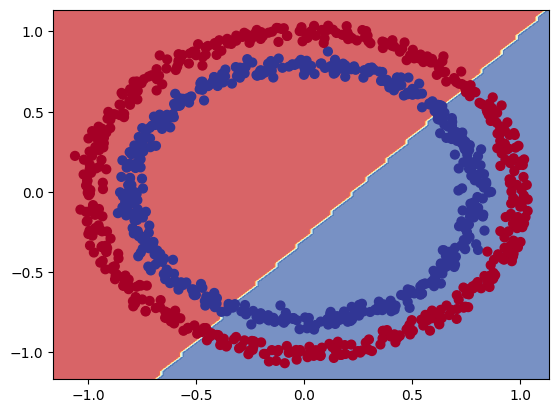

In [18]:
# set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])


# compile our model
model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# fit the model
history_model_3 = model_3.fit(X, y, epochs=100, verbose=0)

# model summary
model_3.summary()

# plot the model on a graph
plot_decision_boundary(model_3, X, y)


### Relu Activation

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step
doing binary classification


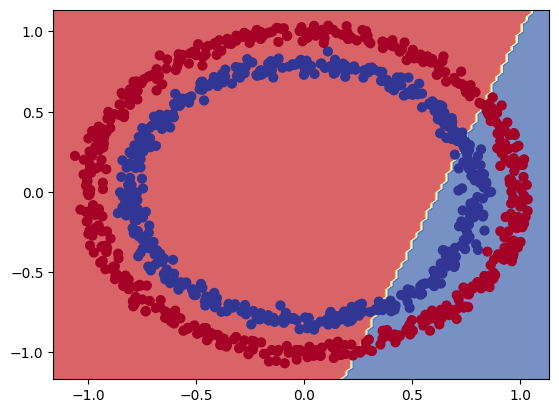

In [21]:
# set random seed
tf.random.set_seed(42)

# build a model
model_relu = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# compile the model
model_relu.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# fit the model
model_relu.fit(X, y, epochs=100, verbose=0)

# model summary
model_relu.summary()

# plot the decision boundary
plot_decision_boundary(model_relu, X, y)

### Tanh Activation

Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.4712 - loss: 4.4325 
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.4432 - loss: 3.5359
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.4715 - loss: 2.2007
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.4682 - loss: 0.7959
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.4785 - loss: 0.7385
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.4916 - loss: 0.7145
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.5027 - loss: 0.6999
Epoch 8/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5211 - loss: 0.6904
Epoch 9/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.5268 - loss: 0.6842
Epoch 10/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.5299 - loss: 0.6802
Epoch 11/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.5046 - loss: 0.6776
Epoch 12/1000
32/32 ━━━━━━━━━

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134 (540.00 B)

 Trainable params: 44 (176.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 90 (364.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
doing binary classification


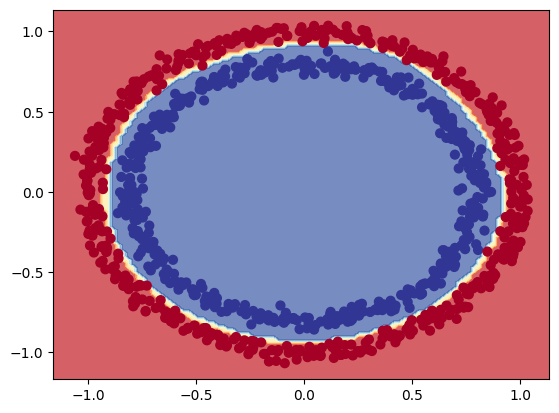

In [42]:
# set random seet
tf.random.set_seed(42)

# build model
model_tanh = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="tanh"),
])

# compile a model
model_tanh.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]    
)

# fit the model
history_model_tanh = model_tanh.fit(X, y, epochs=1000, verbose=1)

# model summary
model_tanh.summary()

plot_decision_boundary(model_tanh, X, y)

Text(0, 0.5, 'loss')

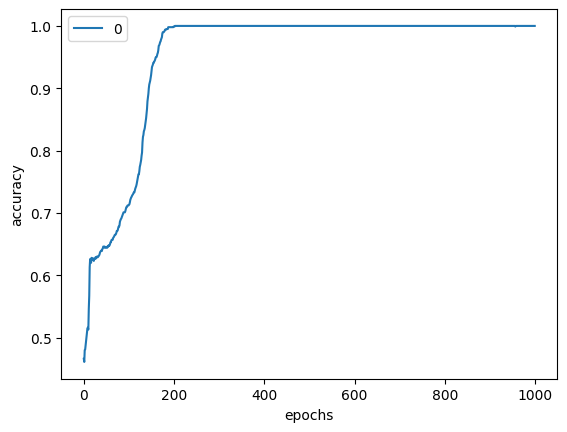

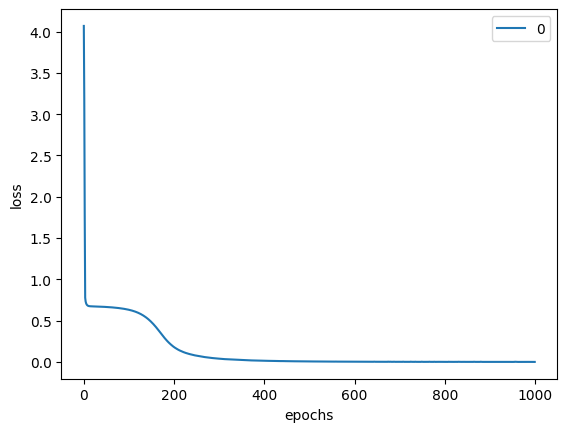

In [44]:
pd.DataFrame(history_model_tanh.history["accuracy"]).plot()
plt.xlabel("epochs")
plt.ylabel("accuracy")

pd.DataFrame(history_model_tanh.history["loss"]).plot()
plt.xlabel("epochs")
plt.ylabel("loss")


##\## sigmoid Activation

Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.4830 - loss: 0.6970 
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.4830 - loss: 0.6955
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.4795 - loss: 0.6948
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.4286 - loss: 0.6944
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.4423 - loss: 0.6941
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.4475 - loss: 0.6940
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.4730 - loss: 0.6939
Epoch 8/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.4823 - loss: 0.6938
Epoch 9/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.4812 - loss: 0.6938
Epoch 10/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.4783 - loss: 0.6938
Epoch 11/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.4767 - loss: 0.6937
Epoch 12/1000
32/32 ━━━━━━━━━

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134 (540.00 B)

 Trainable params: 44 (176.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 90 (364.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
doing binary classification


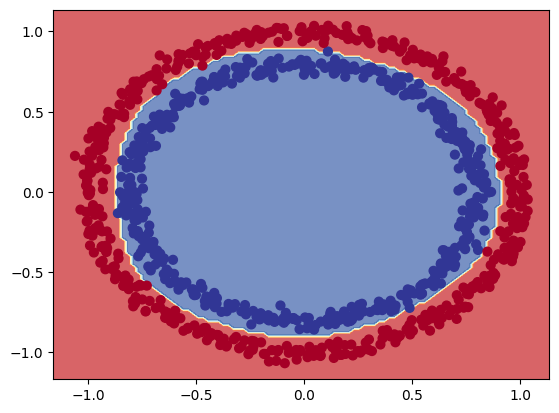

In [48]:
# set random seet
tf.random.set_seed(42)

# build model
model_sigmoid = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="sigmoid"),
    tf.keras.layers.Dense(4, activation="sigmoid"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# compile a model
model_sigmoid.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]    
)

# fit the model
history_model_sigmoid = model_sigmoid.fit(X, y, epochs=1000, verbose=1)

# model summary
model_sigmoid.summary()

# plot decission bondary
plot_decision_boundary(model_sigmoid, X, y)


Text(0, 0.5, 'loss')

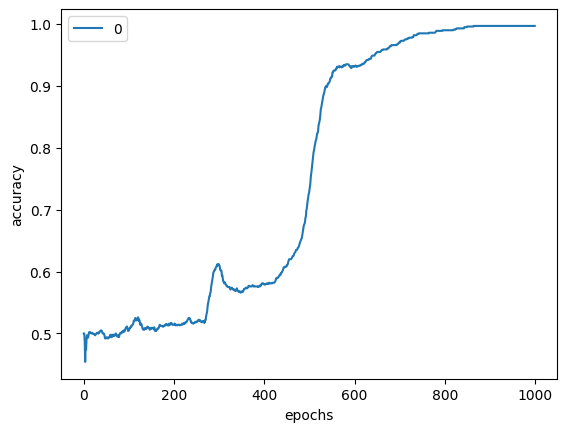

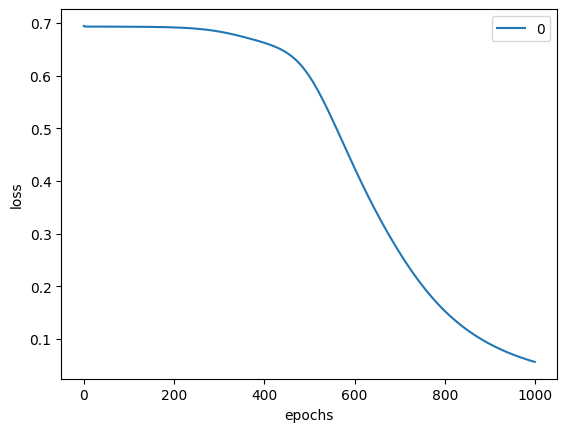

In [49]:
pd.DataFrame(history_model_sigmoid.history["accuracy"]).plot()
plt.xlabel("epochs")
plt.ylabel("accuracy")

pd.DataFrame(history_model_sigmoid.history["loss"]).plot()
plt.xlabel("epochs")
plt.ylabel("loss")